# **Mobina Pournemat**

# Import requirements

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load Data

In [ ]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


# Preprocessing



1.   Random shuffle
2.   Visualization
3.   NaN labels
4.   Batching
5.   Resize
6.   Normalization
7.   Reshape
8.   One-Hot encoding




## 1. Random shuffle
with random shuffle the bias of data decreases.

In [ ]:
def unison_shuffle(a, b):
    inx = np.random.permutation(a.shape[0])
    return a[inx], b[inx]

x_train, y_train = unison_shuffle(x_train, y_train)

## 2. Visualization

To Denoise our images, we can use the gaussian blur function. As the images are blur right now, we don't need to do that again.

[7]


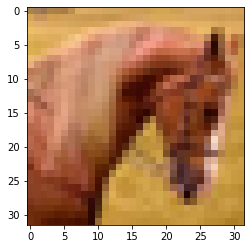

In [ ]:
i = 0       
plt.imshow(x_train[i])
print(y_train[i])
plt.show()

##3. NaN labels
we can find number of Nan labels in data using this syntax.

In [ ]:
count = y_train.shape[0] - np.count_nonzero(~np.isnan(y_train))
print(f'{count} NaN labels')

0 NaN labels


## 4. Batching 

to speed up the learning process we can divide our data into random batches and then use some batches for learning/validation. in this case I divided my training data into 5 batches and use one of them for guessing my hyperparameters.

In [ ]:
x = x_train[:int(x_train.shape[0]/5)]
y = y_train[:int(y_train.shape[0]/5)]

## 5. Resize
with resizing process we can decrease size of images and so the trainnig/testing process getting faster.

In [ ]:
x_train = np.array([cv2.resize(img, (16, 16)) for img in x_train])
x = np.array([cv2.resize(img, (16, 16)) for img in x])
x_test = np.array([cv2.resize(img, (16, 16)) for img in x_test])
x_train.shape, x.shape, x_test.shape

((50000, 16, 16, 3), (10000, 16, 16, 3), (10000, 16, 16, 3))

## 6. Normalization
Normalization has an important role in learning problems. it helps to have more faster and more accurate processes. with the normalization, the accuracy results significantly improved.

In [ ]:
x = x / 255
x_train = x_train / 255
x_test = x_test/ 255

## 7. Reshape

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 16*16*3)
x = x.reshape(x.shape[0], 16*16*3)
x_test = x_test.reshape(x_test.shape[0], 16*16*3)

## 8. One-Hot encoding
In this part I changed the format of y vectors because it was not useable and it converted to one hot format.

In [ ]:
Y_test = y_test.copy()

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y = tf.keras.utils.to_categorical(y)
y_test = tf.keras.utils.to_categorical(y_test)
y_train.shape, y.shape, y_test.shape

((50000, 10), (10000, 10), (10000, 10))

# Static vs Dynamic models

A **static model** is trained offline. we train the model exactly once and then use that trained model for a while.

A **dynamic model** is trained online. data is continually entering the system and we're incorporating that data into the model through continuous updates.

As our dataset is stable and doesn't change over time, we can use static methods. Moreover, dynamic models like k-fold cross validation need more time to process. 

# One hidden layer

with the lower number of neurons, the learning ability of the model decreased and with the higher number of neurons, the model was going to overfit to the training data. so I picked this value as the number of neurons in the hidden state.


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(300, activation=tf.nn.sigmoid, input_dim=16*16*3))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x, y, epochs=30, batch_size=32)

Epoch 1/30
313/313 [==============================] - 1s 2ms/step - loss: 2.0381 - accuracy: 0.2688
Epoch 2/30
313/313 [==============================] - 1s 2ms/step - loss: 1.8683 - accuracy: 0.3403
Epoch 3/30
313/313 [==============================] - 1s 2ms/step - loss: 1.8118 - accuracy: 0.3648
Epoch 4/30
313/313 [==============================] - 1s 2ms/step - loss: 1.7694 - accuracy: 0.3780
Epoch 5/30
313/313 [==============================] - 1s 2ms/step - loss: 1.7215 - accuracy: 0.3940
Epoch 6/30
313/313 [==============================] - 1s 2ms/step - loss: 1.6899 - accuracy: 0.4044
Epoch 7/30
313/313 [==============================] - 1s 2ms/step - loss: 1.6562 - accuracy: 0.4142
Epoch 8/30
313/313 [==============================] - 1s 2ms/step - loss: 1.6270 - accuracy: 0.4279
Epoch 9/30
313/313 [==============================] - 1s 2ms/step - loss: 1.5947 - accuracy: 0.4347
Epoch 10/30
313/313 [==============================] - 1s 2ms/step - loss: 1.5699 - accuracy: 0.4480

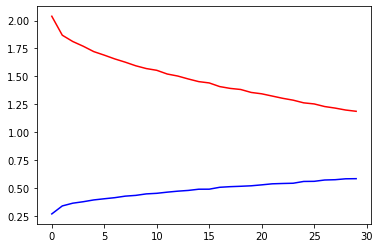

In [ ]:
plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['loss'], 'r-')

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5572 - accuracy: 0.4582


# Hyperparameters


1.   Number of neurons in single hidden layer
2.   Activation function
3.   Optimizer function
4.   Learning-Rate
5.   Number of layers
6.   Number of epochs
7.   Batch size



## 1. Number of neurons in single hidden layer

In [ ]:
neuron_count = [50*i for i in range(1, 13)]

best_neuron_count = neuron_count[0]
loss = []
acc =[]
best_loss = np.inf
best_acc = 0

for n in neuron_count:
    print("-------------Number of neurons: ", n, " -----------")
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(n, activation='sigmoid', input_dim=16*16*3))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    hist = model.fit(x, y, epochs=20, batch_size=32)
    loss.append(hist.history['loss'][-1])
    acc.append(hist.history['acc'][-1])
    if hist.history['acc'][-1] >= best_acc and hist.history['loss'][-1] <= best_loss:
        best_neuron_count = n
        best_loss = hist.history['loss'][-1]
        best_acc = hist.history['acc'][-1]

-------------Number of neurons:  50  -----------
Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 2.0981 - acc: 0.2571
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 1.9191 - acc: 0.3321
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 1.8477 - acc: 0.3507
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 1.8052 - acc: 0.3714
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7733 - acc: 0.3794
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7440 - acc: 0.3912
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7284 - acc: 0.3976
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7043 - acc: 0.4049
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 1.6859 - acc: 0.4127
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 1.6706 - acc: 0.4145


In [ ]:
print("Best neuron number: ", best_neuron_count)
print("Loss: ", best_loss)
print("Accuracy: ", best_acc)

Best neuron number:  500
Loss:  1.3208441734313965
Accuracy:  0.5364000201225281


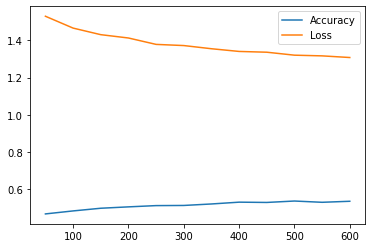

In [ ]:
plt.plot(neuron_count, acc, label='Accuracy')
plt.plot(neuron_count, loss, label='Loss')
plt.legend()
plt.show()

##2. Activation function

The Relu and tanh were faster among activation functions, and sometimes sigmoid was really great in accuracy. I got tanh, sigmoid, elu, relu in differnt runnings of model.




In [ ]:
act_funcs = ['sigmoid', 'relu', 'tanh', 'selu', 'elu']

best_act_func = act_funcs[0]
times = []
acc = []
loss = []
best_time = np.inf
best_acc = 0

for f in act_funcs:
    print("------------ Activation function: ", f, "---------")
    start = time.time()
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(best_neuron_count, activation=f, input_dim=16*16*3))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['acc'])
    hist = model.fit(x, y, epochs=20, batch_size=32)
    end = time.time()
    time_length = end - start
    times.append(time_length)
    acc.append(hist.history['acc'][-1])
    loss.append(hist.history['loss'][-1])
    if time_length <= best_time and hist.history['acc'][-1] >= best_acc:
        best_act_func = f
        best_time = time_length
        best_acc = hist.history['acc'][-1]

------------ Activation function:  sigmoid ---------
Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 2.0095 - acc: 0.2827
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 1.8677 - acc: 0.3448
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 1.8181 - acc: 0.3587
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 1.7691 - acc: 0.3739
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 1.7261 - acc: 0.3901
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 1.6794 - acc: 0.4126
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 1.6468 - acc: 0.4160
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 1.6108 - acc: 0.4278
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 1.5824 - acc: 0.4437
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 1.5585 - acc: 0.4

In [ ]:
print("Best activation function: ", best_act_func)
print("Accuracy: ", best_acc)
print("Time: ", best_time)

Best activation function:  tanh
Accuracy:  0.535099983215332
Time:  15.67020559310913


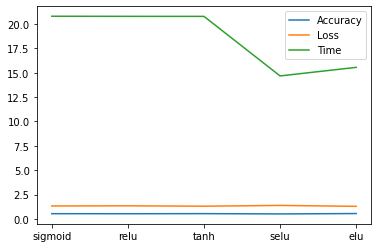

In [ ]:
plt.plot(act_funcs, acc, label='Accuracy')
plt.plot(act_funcs, loss, label='Loss')
plt.plot(act_funcs, times, label='Time')
plt.legend()
plt.show()

##3. Optimizer function

Adagrade and Adadelta were terrible and Adam was always good. so I picked Adam as my optimizer.



In [ ]:
optimizers = [SGD, Adadelta, Adagrad, Adam, RMSprop]

best_opt = optimizers[0]
loss = []
acc = []
best_loss = np.inf
best_acc = 0

for opt in optimizers:
    print("------------- Optimizer: ", opt.__name__, "----------")
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(best_neuron_count, activation=best_act_func, input_dim=16*16*3))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=opt(), loss='categorical_crossentropy', metrics=['acc'])
    hist = model.fit(x, y, epochs=20, batch_size=32)
    loss.append(hist.history['loss'][-1])
    acc.append(hist.history['acc'][-1])
    if hist.history['acc'][-1] >= best_acc and hist.history['loss'][-1] <= best_loss:
        best_opt = opt
        best_loss = hist.history['loss'][-1]
        best_acc = hist.history['acc'][-1]

------------- Optimizer:  SGD ----------
Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 2.1101 - acc: 0.2364
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 1.9434 - acc: 0.3131
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 1.8810 - acc: 0.3470
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 1.8446 - acc: 0.3620
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 1.8199 - acc: 0.3731
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7973 - acc: 0.3764
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7828 - acc: 0.3856
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7678 - acc: 0.3900
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7595 - acc: 0.3891
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7464 - acc: 0.4001
Epoch 11

In [ ]:
print("Best Optimizer: ", best_opt.__name__)
print("Accuracy: ", best_acc)
print("Loss: ", best_loss)

Best Optimizer:  Adam
Accuracy:  0.5443999767303467
Loss:  1.2810508012771606


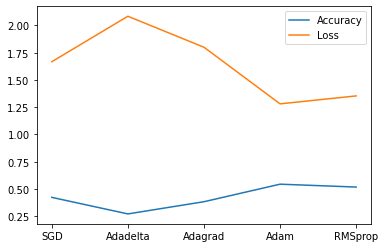

In [ ]:
opt_names = [i.__name__ for i in optimizers]
plt.plot(opt_names, acc, label='Accuracy')
plt.plot(opt_names, loss, label='Loss')
plt.legend()
plt.show()

##4. Learning-Rate

I started with 0.1 and that was terrible because it is too large as a learning rate. and 0.01 was not really good but not bad as 0.1. finally 0.001 was the best learning rate for optimizers.

In [ ]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

loss = []
acc = []
best_lr = learning_rates[0]
best_loss = np.inf
best_acc = 0

for lr in learning_rates:
    print("--------- Learning rate: ", lr, "--------")
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(best_neuron_count, activation=best_act_func, input_dim=16*16*3))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=best_opt(learning_rate=lr), loss='categorical_crossentropy', metrics=['acc'])
    hist = model.fit(x, y, epochs=20, batch_size=32)
    loss.append(hist.history['loss'][-1])
    acc.append(hist.history['acc'][-1])
    if hist.history['loss'][-1] <= best_loss and hist.history['acc'][-1] >= best_acc:
        best_lr = lr
        best_loss = hist.history['loss'][-1]
        best_acc = hist.history['acc'][-1]

--------- Learning rate:  0.1 --------
Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 33.4628 - acc: 0.0989
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 15.4446 - acc: 0.0986
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 16.5741 - acc: 0.0977
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 17.9225 - acc: 0.0982
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 19.3942 - acc: 0.0971
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 16.7444 - acc: 0.0984
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 22.5505 - acc: 0.1000
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 18.5390 - acc: 0.1002
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 21.0626 - acc: 0.0999
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 20.2290 - acc: 0.0967


In [ ]:
print("Best Learning rate: ", best_lr)
print("Accuracy: ", best_acc)
print("Loss: ", best_loss)

Best Learning rate:  0.001
Accuracy:  0.5483999848365784
Loss:  1.2776176929473877


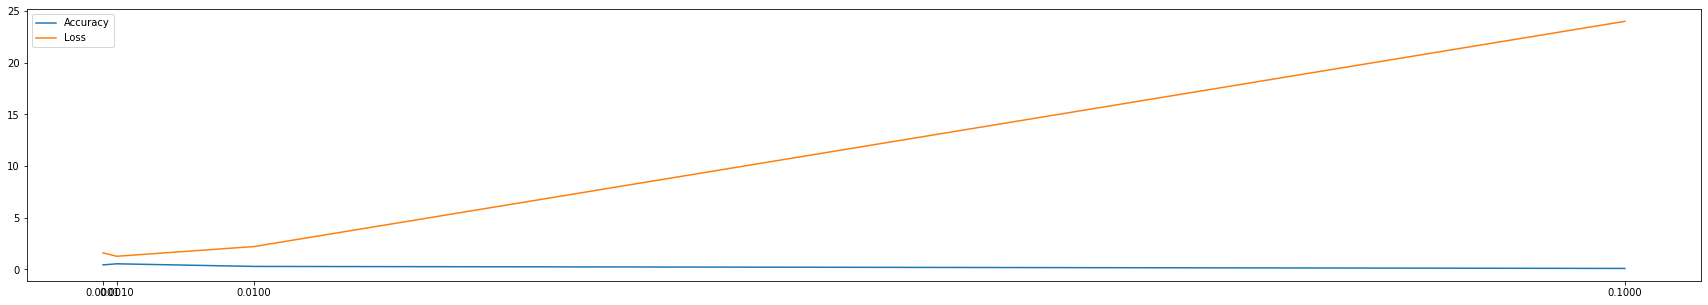

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(learning_rates, acc, label='Accuracy')
plt.plot(learning_rates, loss, label='Loss')
plt.legend()
plt.show()

## 5.Number of layers

I found 3 hidden layers as the best possible state. and more hidden layers caused overfitting to training data and lower number of hidden layers leads to decreasing of learning ability of the model. so I picked 3 and it worked well.

In [ ]:
layers_cnt = [i for i in range(1,10)]

best_layers_cnt = layers_cnt[0]
loss = []
acc = []
best_loss = np.inf
best_acc = 0

for n in layers_cnt:
    print("---------- Number of layers:", n, "---------")
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(best_neuron_count, activation=best_act_func, input_dim=16*16*3))
    for i in range(1, n):
        model.add(tf.keras.layers.Dense(best_neuron_count - i*30, activation=best_act_func))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=best_opt(learning_rate=best_lr), loss='categorical_crossentropy', metrics=['acc'])
    hist = model.fit(x, y, epochs=20, batch_size=32)
    loss.append(hist.history['loss'][-1])
    acc.append(hist.history['acc'][-1])
    if hist.history['acc'][-1] >= best_acc and hist.history['loss'][-1] <= best_loss:
        best_layers_cnt = n
        best_loss = hist.history['loss'][-1]
        best_acc = hist.history['acc'][-1]

---------- Number of layers: 1 ---------
Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 2.0844 - acc: 0.2738
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 1.8646 - acc: 0.3406
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7968 - acc: 0.3664
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 1.7241 - acc: 0.3919
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 1.6901 - acc: 0.4024
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 1.6378 - acc: 0.4217
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 1.6311 - acc: 0.4226
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 1.5940 - acc: 0.4353
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 1.5681 - acc: 0.4441
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 1.5290 - acc: 0.4585
Epoch 11

In [ ]:
print("Best number of layers: ", best_layers_cnt)
print("Accuracy: ", best_acc)
print("Loss: ", best_loss)

Best number of layers:  3
Accuracy:  0.651199996471405
Loss:  0.9491394758224487


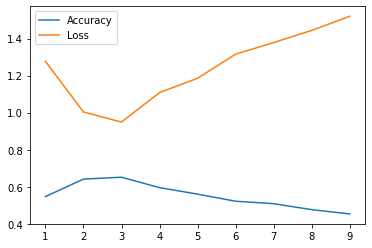

In [ ]:
plt.plot(layers_cnt, acc, label='Accuracy')
plt.plot(layers_cnt, loss, label='Loss')
plt.legend()
plt.show()

##6. Batch size

In [ ]:
batch_size = [2**i for i in range(4, 14)] 

best_batch_size = batch_size[0]
loss = []
acc = []
best_loss = np.inf
best_acc = 0

for size in batch_size:
    print("-------------- Batch size: ", size, "-------------")
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(best_neuron_count, activation=best_act_func, input_dim=16*16*3))
    for i in range(1, best_layers_cnt):
        model.add(tf.keras.layers.Dense(best_neuron_count, activation=best_act_func))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=best_opt(learning_rate=best_lr), loss='categorical_crossentropy', metrics=['acc'])
    hist = model.fit(x, y, epochs=20, batch_size=size)
    acc.append(hist.history['acc'][-1])
    loss.append(hist.history['loss'][-1])
    if hist.history['acc'][-1] >= best_acc and hist.history['loss'][-1] <= best_loss:
        best_batch_size = size
        best_loss = hist.history['loss'][-1]
        best_acc = hist.history['acc'][-1]

-------------- Batch size:  16 -------------
Epoch 1/20
625/625 [==============================] - 2s 2ms/step - loss: 2.1331 - acc: 0.2502
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 1.9412 - acc: 0.3074
Epoch 3/20
625/625 [==============================] - 1s 2ms/step - loss: 1.8614 - acc: 0.3324
Epoch 4/20
625/625 [==============================] - 1s 2ms/step - loss: 1.7960 - acc: 0.3509
Epoch 5/20
625/625 [==============================] - 1s 2ms/step - loss: 1.7652 - acc: 0.3670
Epoch 6/20
625/625 [==============================] - 1s 2ms/step - loss: 1.7272 - acc: 0.3815
Epoch 7/20
625/625 [==============================] - 2s 2ms/step - loss: 1.6707 - acc: 0.3971
Epoch 8/20
625/625 [==============================] - 2s 2ms/step - loss: 1.6460 - acc: 0.4111
Epoch 9/20
625/625 [==============================] - 1s 2ms/step - loss: 1.5999 - acc: 0.4182
Epoch 10/20
625/625 [==============================] - 1s 2ms/step - loss: 1.5448 - acc: 0.4450
Epoc

In [ ]:
print("Best batch size: ", best_batch_size)
print("Accuracy: ", best_acc)
print("Loss: ", best_loss)

Best batch size:  32
Accuracy:  0.6543999910354614
Loss:  0.9369038939476013


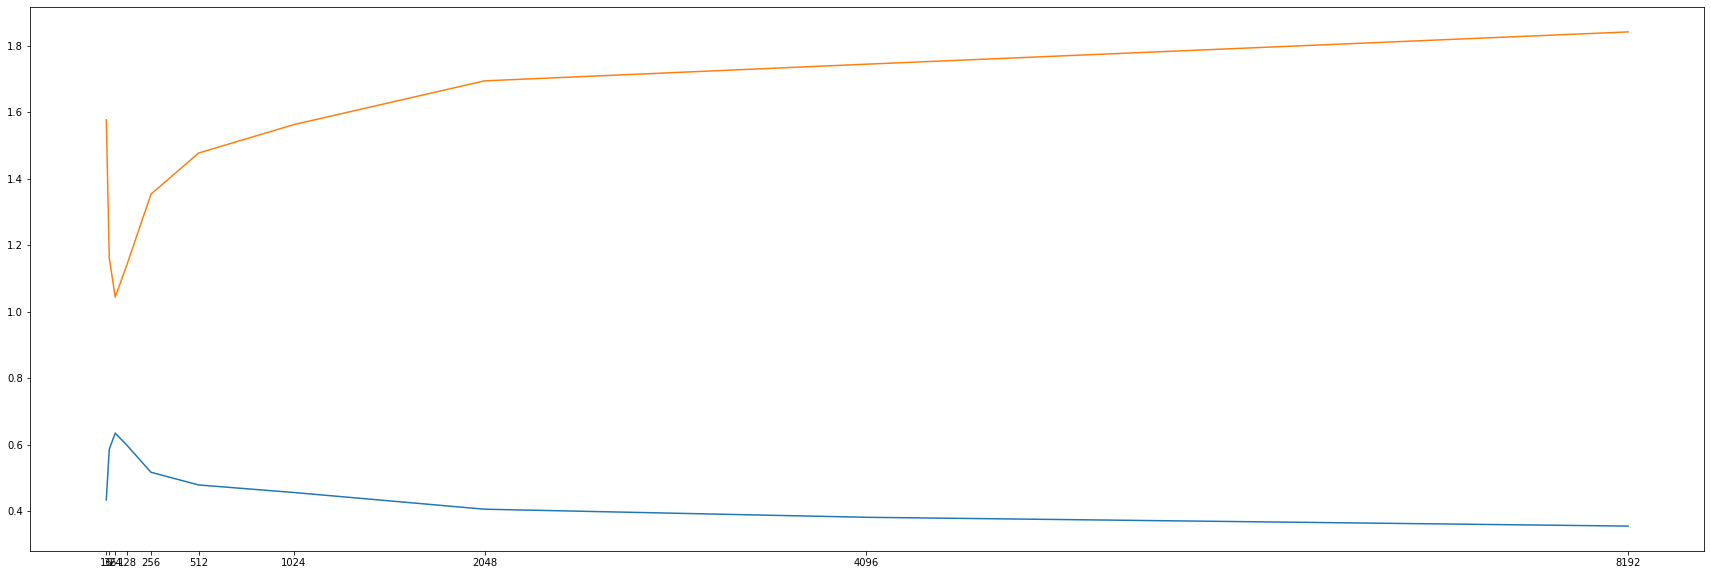

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(batch_size)
plt.plot(batch_size, acc, label='Accuracy')
plt.plot(batch_size, loss, label='Loss')
plt.show()

##7. Number of epochs

In [ ]:
epoch_cnt = [10*i for i in range(1, 8)]

best_epoch_cnt = epoch_cnt[0]
loss = []
acc = []
best_loss = np.inf
best_acc = 0

for i in epoch_cnt:
    print("------------ Number of epochs: ", i, "--------------")
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(best_neuron_count, activation=best_act_func, input_dim=16*16*3))
    for j in range(1, best_layers_cnt):
        model.add(tf.keras.layers.Dense(best_neuron_count, activation=best_act_func))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=best_opt(learning_rate=best_lr), loss='categorical_crossentropy', metrics=['acc'])
    hist = model.fit(x, y, batch_size=best_batch_size, epochs=i)
    acc.append(hist.history['acc'][-1])
    loss.append(hist.history['loss'][-1])
    if hist.history['acc'][-1] >= best_acc and hist.history['loss'][-1] <= best_loss:
        best_epoch_cnt = i
        best_loss = hist.history['loss'][-1]
        best_acc = hist.history['acc'][-1]

------------ Number of epochs:  10 --------------
Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 2.1163 - acc: 0.2500
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 1.8716 - acc: 0.3270
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 1.8122 - acc: 0.3516
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 1.7824 - acc: 0.3611
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 1.7131 - acc: 0.3887
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6641 - acc: 0.4003
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6395 - acc: 0.4083
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6106 - acc: 0.4212
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 1.5794 - acc: 0.4271
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 1.5484 - acc: 0.4457

In [ ]:
print("Best epochs number: ", best_epoch_cnt)
print("Accuracy: ", best_acc)
print("Loss: ", best_loss)

Best epochs number:  70
Accuracy:  0.9218999743461609
Loss:  0.23556870222091675


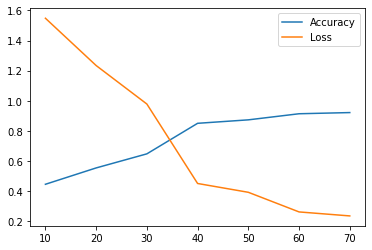

In [ ]:
plt.plot(epoch_cnt, acc, label='Accuracy')
plt.plot(epoch_cnt, loss, label='Loss')
plt.xticks(epoch_cnt)
plt.legend()
plt.show()

Until now, I find the best values for hyperparameters. but they are not the best actually; because they may cause overfitting to training data. in every step of this task, I tried to guess one of the hyperparameters using those which guessed so far. Eventually, I can use them for my multi-layer perceptron model and check out the results.

# Multi layer perceptron

In [ ]:
mlp = tf.keras.models.Sequential()
mlp.add(tf.keras.layers.Dense(best_neuron_count, activation=best_act_func, input_dim=16*16*3)) 
for i in range(1, best_layers_cnt):
    mlp.add(tf.keras.layers.Dense(best_neuron_count - 30*i, activation=best_act_func))
mlp.add(tf.keras.layers.Dense(10, activation='softmax'))  

mlp.compile(optimizer=best_opt(learning_rate=best_lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = mlp.fit(x_train, y_train, epochs=best_epoch_cnt , batch_size=best_batch_size)

Epoch 1/70
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8962 - accuracy: 0.3156
Epoch 2/70
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7362 - accuracy: 0.3755
Epoch 3/70
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6780 - accuracy: 0.3962
Epoch 4/70
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6327 - accuracy: 0.4118
Epoch 5/70
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6112 - accuracy: 0.4232
Epoch 6/70
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5875 - accuracy: 0.4294
Epoch 7/70
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5805 - accuracy: 0.4346
Epoch 8/70
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5660 - accuracy: 0.4404
Epoch 9/70
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5577 - accuracy: 0.4415
Epoch 10/70
1563/1563 [==============================] - 4s 3ms/step - loss: 1.555

In [ ]:
loss, acc = mlp.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6125 - accuracy: 0.4308


In [ ]:
pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['loss'], 'r-')

With these values of hyperparameters, the model doesn't overfit to the data but it couldn't gain great results. with the more epochs and with the relu activation function the model gets overfit to the data and the accuracy of train data increased significantly but there was no impressive improvement in the accuracy of test data. so I preferred to have a model with a bit lower accuracy but not overfit to the training set.

Moreover, The model with the simple multi-layer perceptron gets good results. Because I saw there are convolutional and pooling layers, RNNs, Dropout and, ... in those models that gained impressive results. To get better results, we can use convolutional layers, pooling layers, RNNs, Dropout, data augmentation, and,...

# Save and Load Model

In [ ]:
mlp.save('MLP_Model')

INFO:tensorflow:Assets written to: MLP_Model/assets


In [ ]:
model = tf.keras.models.load_model('MLP_Model')

# Evaluation

## Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, pred)
conf_mat

array([[444, 131,  85,  18,   9,  28,  11,  92, 112,  70],
       [ 17, 716,  26,  23,   2,  19,   6,  50,  26, 115],
       [ 82,  49, 305,  83,  88, 114,  48, 180,  33,  18],
       [ 37,  59,  88, 299,  20, 250,  43, 120,  18,  66],
       [ 51,  28, 186,  70, 258,  96,  55, 218,  22,  16],
       [ 24,  43, 103, 171,  29, 390,  25, 159,  21,  35],
       [ 14,  33, 122, 177,  99, 109, 303, 100,  17,  26],
       [ 29,  39,  64,  52,  23,  69,   6, 640,  10,  68],
       [102, 182,  26,  24,   5,  38,   2,  42, 500,  79],
       [ 24, 329,  13,  31,   2,  19,   6,  75,  48, 453]])

## Measurements

In [ ]:
acc = []
prec = []
rec = []
f1 = []
tp = [0 for i in range(10)]
tn = [0 for i in range(10)]
fp = [0 for i in range(10)]
fn = [0 for i in range(10)]
for i in range(10):
    tp[i] = conf_mat[i][i]
    fp[i] = sum(conf_mat[:,i])-tp[i]
    fn[i] = sum(conf_mat[i,:])-tp[i]
    tn[i] = sum(sum(conf_mat))-tp[i]-fn[i]-fp[i]
    acc.append((tp[i]+tn[i]) / (tp[i]+tn[i]+fp[i]+fn[i]))
    rec.append((tp[i]) / (tp[i]+fn[i]))
    prec.append((tp[i]) / (tp[i]+fp[i]))
    f1.append((2*prec[i]*rec[i]) / (prec[i]+rec[i]))
measurements = pd.DataFrame(list(zip(acc, prec, rec, f1)), columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])
measurements

,Accuracy,Precision,Recall,F1-score
0,0.9064,0.538835,0.444,0.486842
1,0.8823,0.444997,0.716,0.548869
2,0.8592,0.299607,0.305,0.302279
3,0.8650,0.315401,0.299,0.306982
4,0.8981,0.482243,0.258,0.336156
5,0.8648,0.344523,0.390,0.365854
6,0.9101,0.600000,0.303,0.402658
7,0.8604,0.381862,0.640,0.478326
8,0.9193,0.619579,0.500,0.553403
9,0.8960,0.478858,0.453,0.465570


That was better to don't add extra requirements (Pandas) to the problem. but pandas dataframe was the best way that I know, to show tables like this.